![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Elastodynamik 3D

Module laden

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave3d_reflection_interaction.ipynb
printing.init_printing()
%load_ext ipydex.displaytools

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Reflexion einer P-Welle am freien Rand

![wave3d_freeBC.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/wave3d_freeBC.svg)

Variablen für symbolische Rechnung (sympy) deklarieren

In [2]:
mu, Lambda, alpha, beta, AP_in, AP_re, AS_re, kappa_P, kappa_S, c_P, c_S, x,y,z,t = sp.symbols('mu Lambda alpha beta AP_in AP_re AS_re kappa_P kappa_S c_P c_S x y z t')

Phasen der einfallenden P-Welle, der reflektierten P-Welle und der reflektierten SH-Welle

In [3]:
phase_Pin = sp.I*kappa_P*(x*sp.sin(alpha) + y*sp.cos(alpha) - c_P*t)
phase_Pre = sp.I*kappa_P*(x*sp.sin(alpha) - y*sp.cos(alpha) - c_P*t)
phase_Sre = sp.I*kappa_S*(x*sp.sin( beta) - y*sp.cos( beta) - c_S*t)

Komplexe Darstellung der Wellenausbreitung aller drei Wellen

In [4]:
eP_in = AP_in * sp.exp(phase_Pin)
eP_re = AP_re * sp.exp(phase_Pre)
eS_re = AS_re * sp.exp(phase_Sre)

Veschiebungen (x,y) der drei Wellenfelder

In [5]:
uP_in = sp.sin(alpha) * eP_in
uP_re = sp.sin(alpha) * eP_re
uS_re = sp.cos( beta) * eS_re

In [6]:
vP_in = sp.cos(alpha) * eP_in
vP_re =-sp.cos(alpha) * eP_re
vS_re = sp.sin( beta) * eS_re

Spannungen $\sigma_{xy}$ und $\sigma_{yy}$, die relevant für die Reflexion sind

In [7]:
sigma_xy_Pin = mu*( sp.diff(uP_in, y) + sp.diff(vP_in, x) )
sigma_xy_Pre = mu*( sp.diff(uP_re, y) + sp.diff(vP_re, x) )
sigma_xy_Sre = mu*( sp.diff(uS_re, y) + sp.diff(vS_re, x) )

In [8]:
sigma_yy_Pin = (2*mu+Lambda)*sp.diff(vP_in, y) + Lambda*sp.diff(uP_in, x)
sigma_yy_Pre = (2*mu+Lambda)*sp.diff(vP_re, y) + Lambda*sp.diff(uP_re, x)
sigma_yy_Sre = (2*mu+Lambda)*sp.diff(vS_re, y) + Lambda*sp.diff(uS_re, x)

Auswertung der Spannungen am Rand

In [9]:
sigma_xy_BC = sp.simplify( sigma_xy_Pin*sp.exp(-phase_Pin)/sp.I + sigma_xy_Pre*sp.exp(-phase_Pre)/sp.I + sigma_xy_Sre*sp.exp(-phase_Sre)/sp.I)
sigma_yy_BC = sp.simplify( sigma_yy_Pin*sp.exp(-phase_Pin)/sp.I + sigma_yy_Pre*sp.exp(-phase_Pre)/sp.I + sigma_yy_Sre*sp.exp(-phase_Sre)/sp.I)

In [10]:
display(sigma_xy_BC)
display(sigma_yy_BC)

Gleichungssystem der Randbedingungen (freier Rand) nach den Amplituden der reflektierten Wellen lösen

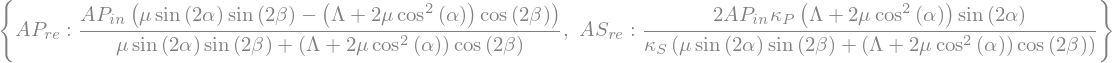

In [11]:
solution = sp.solve( [sigma_xy_BC, sigma_yy_BC], [AP_re, AS_re] )
display(solution)

Grafische Darstellung der Reflexion

In [12]:
interactive_reflection_plot()  

interactive(children=(IntSlider(value=45, description='$\\alpha$ [°]:', max=90), IntSlider(value=25, descripti…

Frage: In welchem Fall wird nur eine P-Welle reflektiert und in welchem nur eine S-Welle?